In [1]:
import numpy as np
import matplotlib.pyplot as plt

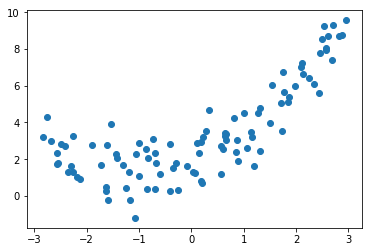

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

plt.scatter(X, y)
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
y_predict = lin_reg.predict(X)

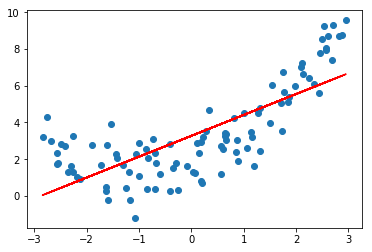

In [6]:
plt.scatter(X, y)
plt.plot(X, y_predict, color='r')
plt.show()

## 解决方案, 添加一个特征

In [7]:
X2 = np.hstack([X, X**2])
X2.shape

(100, 2)

In [8]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

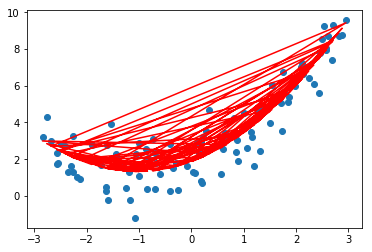

In [9]:
plt.scatter(X, y)
plt.plot(X, y_predict2, color='r')
plt.show()

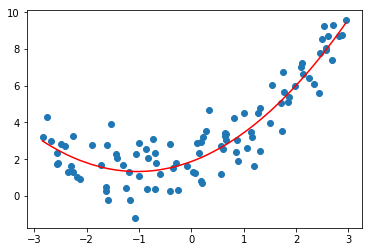

In [11]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [14]:
lin_reg2.coef_

array([1.05332985, 0.50915319])

# scikit-learn中的多项式回归和Pipeline

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X3 = poly.transform(X)
X3.shape

(100, 3)

In [18]:
X3[:5,:]

array([[ 1.        , -2.01828362,  4.07346879],
       [ 1.        , -0.36218678,  0.13117927],
       [ 1.        ,  1.24540814,  1.55104144],
       [ 1.        , -2.6565265 ,  7.05713302],
       [ 1.        ,  1.73255417,  3.00174395]])

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg3 = LinearRegression()
lin_reg3.fit(X3, y)
y_predict3 = lin_reg3.predict(X3)

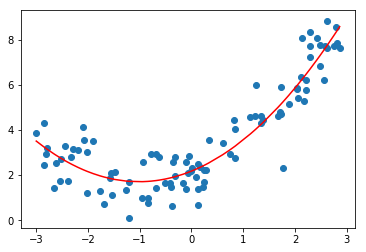

In [20]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict3[np.argsort(x)], color='r')
plt.show()

## 关于 PolynomialFeatures

In [21]:
X = np.arange(1,11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [23]:
# x1,x2  -> x1^2 + x2^2 + x1*x2
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])

In [26]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

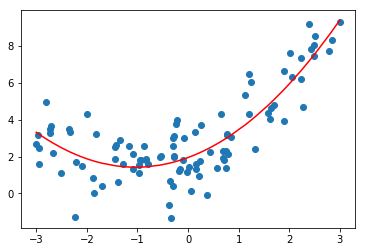

In [27]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()